In [1]:
# import os
# # import Google Drive 套件
# from google.colab import drive
# # 將自己的雲端硬碟掛載上去
# drive.mount('/content/gdrive')

# os.chdir('./gdrive/MyDrive/Colab Notebooks/deep_learning/hw4')      # 檔案目錄

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
# os.listdir('./../../../../../'), os.getcwd()

(['.config', 'images', 'gdrive', 'sample_data'],
 '/content/gdrive/MyDrive/Colab Notebooks/deep_learning/hw4')

In [3]:
# import shutil
# shutil.copyfile('./images.zip', './../../../../../images.zip')

'./../../../../../images.zip'

In [5]:
# import zipfile
# def zip_list(file_path):
#     zf = zipfile.ZipFile(file_path, 'r')
#     zf.extractall('./../../../../../')

# file_path = './../../../../../images.zip'
# zip_list(file_path)

In [6]:
# os.remove('./../../../../../images.zip')

In [1]:
import numpy as np
import cv2
import tensorflow as tf
from tensorflow import keras
import functions as fc
import LeNet_module_tf as mc
import importlib
import pandas as pd
import random
import pickle
import time
import matplotlib.pyplot as plt

In [4]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
gpus = tf.config.list_physical_devices('GPU')
gpus

Num GPUs Available:  0


[]

In [5]:
!nvidia-smi

Mon May 03 12:47:04 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 442.23       Driver Version: 442.23       CUDA Version: 10.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 165... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   48C    P8     4W /  N/A |    134MiB /  4096MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

# Load  image  data

In [2]:
train_df = pd.read_csv('./images/train.txt', sep=' ', header=None)
test_df = pd.read_csv('./images/test.txt', sep=' ', header=None)
val_df = pd.read_csv('./images/val.txt', sep=' ', header=None)
train_paths, train_response = './images/' + train_df[0].to_numpy(), train_df[1].to_numpy()
test_paths, test_response = './images/' + test_df[0].to_numpy(), test_df[1].to_numpy()
val_paths, val_response = './images/' + val_df[0].to_numpy(), val_df[1].to_numpy()
train_paths.shape, test_paths.shape, val_paths.shape

((63325,), (450,), (450,))

In [ ]:
# train_paths = train_paths[0:10]

In [6]:
# train_df = pd.read_csv('./images/train.txt', sep=' ', header=None)
# test_df = pd.read_csv('./images/test.txt', sep=' ', header=None)
# val_df = pd.read_csv('./images/val.txt', sep=' ', header=None)
# train_paths, train_response = './../../../../../images/' + train_df[0].to_numpy(), train_df[1].to_numpy()
# test_paths, test_response = './../../../../../images/' + test_df[0].to_numpy(), test_df[1].to_numpy()
# val_paths, val_response = './../../../../../images/' + val_df[0].to_numpy(), val_df[1].to_numpy()
# train_paths.shape, test_paths.shape, val_paths.shape

((63325,), (450,), (450,))

In [ ]:
# train_paths = train_paths[0:5]

# module define tensorflow

In [ ]:
importlib.reload(mc)
importlib.reload(fc)

<module 'functions' from 'D:\\study\\成大\\soa2\\deep_learning\\hw4\\functions.py'>

In [10]:
epochs = 50
batchs = 200
lr = 0.01

In [11]:
module = mc.LeNet_module()
lossfun = tf.keras.losses.CategoricalCrossentropy()
opt = keras.optimizers.Adam(learning_rate=lr, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False)
len(module.get_weights())

0

In [12]:
inputs = fc.path2pic_tf(train_paths[0:3])
inputs = tf.constant(inputs, dtype=tf.float32)
outputs = module(inputs)
real = train_response[0:3]
real = tf.one_hot(real, depth=50)
len(module.get_weights())

14

In [18]:
with tf.GradientTape() as tape:
    outputs = module(inputs)
    loss = lossfun(real, outputs)
    grads = tape.gradient(loss, module.trainable_weights)

In [19]:
loss

<tf.Tensor: shape=(), dtype=float32, numpy=3.9120228>

In [20]:
grads

[<tf.Tensor: shape=(5, 5, 3, 6), dtype=float32, numpy=
 array([[[[0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0.]],
 
         [[0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0.]],
 
         [[0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0.]],
 
         [[0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0.]],
 
         [[0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0.]]],
 
 
        [[[0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0.]],
 
         [[0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0.]],
 
         [[0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0.]],
 
         [[0., 0., 0., 0., 0., 0.],
          [0., 0.,

In [10]:
logger = fc.create_logger('./logger/', 'logger_tf.txt')

In [ ]:
# logger.disabled = True  #暫停 logger
# for i in logger.handlers:
#     logger.removeHandler(i)
# logger.handlers = []
# del(logger)

In [11]:
train_accu1 = []
val_accu1 = []
train_accu5 = []
val_accu5 = []

# train

In [12]:
module_save_path = './model/module_tf.h5'
accu_save_path = './model/accu_tf.pickle'

In [ ]:
# inputs = fc.path2pic(train_paths[0:2])
# inputs = tf.constant(inputs, dtype=tf.float32)
# outputs = module(inputs)

In [ ]:
# module_save_path = './model/module_tf.h5'
# module.load_weights(module_save_path)

In [13]:
N = train_paths.shape[0]
trainIndex = [i for i in range(N)]
random.shuffle(trainIndex)

In [ ]:
module_save_path = './model/module_tf.h5'
accu_save_path = './model/accu_tf.pickle'

start = time.time()
logger.info('start at {}'.format(start))

for epoch in range(1, epochs+1):
    logger.info('-' * 10)
    logger.info('Epoch {}/{}'.format(epoch, epochs))
    
    for phase in ['train', 'val']:
        if phase == 'train':
            c = 0
            while c < N:
                Index = trainIndex[c:c+batchs]
                imgList = train_paths[Index]
                inputs = fc.path2pic_tf(imgList)
                inputs = tf.constant(inputs, dtype=tf.float32)
                real = train_response[Index]
                real = tf.one_hot(real, depth=50)
                with tf.GradientTape() as tape:
                    outputs = module(inputs)
                    loss = lossfun(real, outputs)
                    grads = tape.gradient(loss, module.trainable_weights)
                opt.apply_gradients(zip(grads, module.trainable_weights))
                logger.info('loss: {}'.format(loss.numpy()))
                c += batchs
    #         inputs = fc.path2pic_tf(np.random.choice(train_paths, replace=False, size=200))
    #         inputs = tf.constant(inputs, dtype=tf.float32)
    #         outputs = module(inputs)
    #         accu1 = fc.top_n_accuracy(outputs.numpy(), train_response, n=1)
    #         accu5 = fc.top_n_accuracy(outputs.numpy(), train_response, n=5)
    #         train_accu1.append(accu1)
    #         train_accu5.append(accu5)
            
    #     else:
    #         inputs = fc.path2pic_tf(val_paths)
    #         inputs = tf.constant(inputs, dtype=tf.float32)
    #         outputs = module(inputs)
    #         accu1 = fc.top_n_accuracy(outputs.numpy(), val_response, n=1)
    #         accu5 = fc.top_n_accuracy(outputs.numpy(), val_response, n=5)
    #         val_accu1.append(accu1)
    #         val_accu5.append(accu5)
        
    #     accu_dict = {'train1':train_accu1, 'val1':val_accu1, 'train5':train_accu5, 'val5':val_accu5}
    # with open(accu_save_path, 'wb') as f:
    #     pickle.dump(accu_dict, f)

    # train_time = time.time() - start
    # module.save_weights(module_save_path)
    # logger.info('train time {}, {}/{}'.format(train_time, epoch, epochs))

2021-05-03 04:31:27,803 INFO start at 1620016287.8031998
2021-05-03 04:31:27,804 INFO ----------
2021-05-03 04:31:27,806 INFO Epoch 1/50


# test

In [7]:
module_save_path = './model/tf/module_tf.h5'
accu_save_path = './model/tf/accu_tf.pickle'

In [3]:
module = mc.LeNet_module()

In [5]:
inputs = fc.path2pic_tf(train_paths[0:3])
inputs = tf.constant(inputs, dtype=tf.float32)
outputs = module(inputs)
# module.load_weights(module_save_path)

In [8]:
module.load_weights(module_save_path)

In [9]:
test_df = pd.read_csv('./images/test.txt', sep=' ', header=None)
test_response = test_df[1].to_numpy()

with open(accu_save_path, 'rb') as f:
    accu_dict = pickle.load(f)

In [10]:
inputs = fc.path2pic_tf(test_paths)
inputs = tf.constant(inputs, dtype=tf.float32)
Ypred = module(inputs)

In [13]:
Ypred = Ypred.numpy()

In [14]:
# top 1 accuracy                      top 5 accuracy
fc.top_n_accuracy(Ypred, test_response, n=1), fc.top_n_accuracy(Ypred, test_response, n=5)

(0.02, 0.1)

# draw Curve

In [15]:
train_accu1 = accu_dict['train1']
val_accu1 = accu_dict['val1']
train_accu5 = accu_dict['train5']
val_accu5 = accu_dict['val5']

In [16]:
val_accu1[-1], val_accu5[-1]

(0.02, 0.1)

In [17]:
X = [i for i in range(len(train_accu1))]

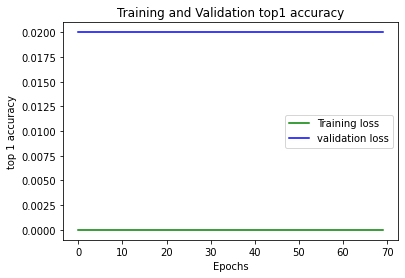

In [18]:
plt.plot(X, train_accu1, 'g', label='Training loss')
plt.plot(X, val_accu1, 'b', label='validation loss')
plt.title('Training and Validation top1 accuracy')
plt.xlabel('Epochs')
plt.ylabel('top 1 accuracy')
plt.legend()
plt.savefig('top1 accuracy.png')
plt.show()

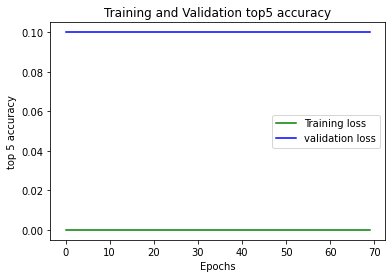

In [19]:
plt.plot(X, train_accu5, 'g', label='Training loss')
plt.plot(X, val_accu5, 'b', label='validation loss')
plt.title('Training and Validation top5 accuracy')
plt.xlabel('Epochs')
plt.ylabel('top 5 accuracy')
plt.legend()
plt.savefig('top5 accuracy.png')
plt.show()